# Crawling

해당 노트북의 대부분의 내용은 "데이터 과학 기반의 파이썬 빅데이터 분석"에 포함되어 있다.

## 크롤링(crawling) 개요

 - 빅데이터 분석을 위해서 데이터를 인터넷을  이용하는데, 이를 통해 다양한 데이터를 빠르게 실시간으로 수집할 수 있다.

이러한 데이터를 수집하는 기술을 **크롤링(crawing)** 이라고 부른다.

### 웹 통신 방법의 이해

어떠한 방식으로 크롤링이 동작하는지를 이해하기 위해서는 웹이 어떠한 방식으로 통신하고 있는지에 대해서 이해할 필요가 있다.



- 어떤 프로토콜을 이용해서 통신을 하는가?

웹은 일반적으로 클라이언트(유저, 예를 들어 웹브라우저), 서버(예를 들어 네이버와 같은 웹사이트), 리소스(이미지, 예를 들어 네이버 웹툰)로 구성되어 있으며, 이들 간의 데이터를 주고 받기 위해서 **HTTP 통신**을 한다.

- 데이터를 어떻게 주고 받는가?

사용자가 데이터를 가지고 있는 서버의 url에 접속하면, HTTP 요청을 서버측에게 전송을 한다. 이때 서버는 그에 대한 응답으로 HTML, JSON, XML 과 같은 형식을 통해서 데이터를 클라이언트에게 전송해준다.

이때 사용하는 것이 **API(Application Programming Interface)** 이고, 그중 **REST API**를 사용한다.
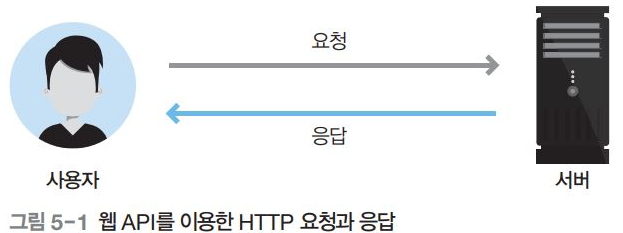

- API(Application Programming Interface)는 무엇인가?

> API 또는 애플리케이션 프로그래밍 인터페이스(Application Programming Interface)는 애플리케이션 소프트웨어를 구축하고 통합하는 정의 및 프로토콜 세트이다.

API를 사용하면 구현 방식을 알지 못해도 애플리케이션 또는 서비스가 서로 커뮤니케이션할 수 있으며 개발 시간과 비용을 절약할 수 있다. 예를 들어, GUI Programming이 대표적인 예시이다.


[참고링크]
- https://www.redhat.com/ko/topics/api/what-are-application-programming-interfaces

- 그렇다면, REST(Representational State Transfer) API는 무엇일까?

REST API는 프로토콜이나 표준이 아닌 아키텍처 원칙 세트이다. 따라서 해당 아키텍처만 지킨다면, 다양한 방식으로 구현할 수 있다. 더 자세한 내용은 [REST API 제대로 알고 사용하기](https://meetup.toast.com/posts/92)를 참고하면 된다.

예를 들어, 네이버 웹툰을 본다고 가정해보자. 사용자가 네이버 웹툰 사이트에 들어가면, 웹툰(리소스)을 저장하고 있는 서버에게 HTTP 요청을 보낸다. 그 후 서버는 그에 대한 응답으로 웹툰(리소스)을 사용자에게 전송하고, 사용자가 이용하고 있는 애플리케이션(웹브라우저 일 수도 있고, 네이버 웹툰 앱일 수도 있음)를 통해서 웹툰(리소스)을 볼 수 있는 것이다.




[참고링크]
- https://www.redhat.com/ko/topics/api/what-is-a-rest-api

![REST API](https://phpenthusiast.com/theme/assets/images/blog/what_is_rest_api.png?021019a)

## API를 이용한 크롤링

애플리케이션 또는 서비스를 제공해주는 IT 기업들은 이러한 API를 무료 또는 유료로 제공해주고 있으며, 해당 사이트 개발자 등록을 하고 인증키를 발급 받으며 사용할 수 있다. 이를 통해서, 얻고자 하는 데이터가 API 형태로 제공되고 있다면, 손쉽고 빠르게 얻을 수 있다.

대표적인 웹 사이트는 다음과 같다.

|종류|주소|
|:---|:---|
|네이버 개발자 센터|https://developers.naver.com|
|카카오 앱 개발 플랫폼 서비스|https://developers.kakao.com|
|페이스북 개발자 센터|https://developers.facebook.com|
|트위터 개발자 센터|https://developer.twitter.com|
|공공데이터포털|https://www.data.go.kr/|
|세계 날씨|https://openweathermap.org/|
|유료/무료 API 스토어|http://mashup.or.kr<br>http://www.apistore.co.kr/api/apiList.do|

### 네이버 API를 이용한 크롤링

#### 준비사항

- 네이버 개발자 센터 접속

네이버 API를 이용하기 위해서 [네이버 개발자 센터](https://developers.naver.com)에 접속한 뒤 화면 하단의 "서비스 API"를 클릭한다.

![네이버 개발자 센터 접속](https://user-images.githubusercontent.com/45147152/115123194-f10f1200-9ff6-11eb-9430-2543c8a042aa.jpg)

- Open API 이용 신청

화면 왼쪽의 "검색"을 선택하고, 하단의 "오픈 API 이용 신청" 버튼을 클릭한다. (네이버 로그인이 되어 있어야 한다.)

![Open API 이용 신청](https://user-images.githubusercontent.com/45147152/115123198-f3716c00-9ff6-11eb-8898-6a3cd0845bca.jpg)

- 애플리케이션 등록(API 이용 신청)

애플리케이션 이름은 임의로 지정해도 된다.(여기서는 nvBig으로 지정) 사용 API는 검색을 선택한다. 서비스를 재공할 애플리케이션이 없으므로, 비로그인 오픈 API 서비스 환경은 "WEB 설정" 선택하고 "http://localhost"를 입력하고 "등록하기"버튼을 누른다.

![애플리케이션 등록](https://user-images.githubusercontent.com/45147152/115123200-f4a29900-9ff6-11eb-91ff-d8976e94ab72.jpg)

- 애플리케이션 정보 확인

신규 애플리케이션이 등록되면 "개요" 항목에서 애플리케이션 정보를 확인할 수 있다. 당일 얼만큼 사용 했는지 파악할 수 있다.

여기서 가장 중요한 정보는 **Clinear ID**와 **Client Secret**이다. 이를 이용해서 네이버 검색 API를 사용할 수 있다.

![애플리케이션 정보 확인](https://user-images.githubusercontent.com/45147152/115123202-f5d3c600-9ff6-11eb-8733-5893c62108f9.jpg)

- 검색 API 이용 안내 페이지 확인

화면 상단의 [Documents]-[서비스 API]-[검색]을 선택하면 검색 API 이용 안내 페이지로 이동한다.

여기서 API 호출을 어떻게 하는지, API 기본 정보와 요청 변수에 대한 설명을 확인할 수 있다.

![파이썬 샘플 코드](https://user-images.githubusercontent.com/45147152/115123205-f704f300-9ff6-11eb-95ef-070f4d459a69.jpg)

![API 기본 정보와 요청 변수 확인](https://user-images.githubusercontent.com/45147152/115123207-f8362000-9ff6-11eb-962c-7ec700b0c306.jpg)

#### 네이버 뉴스 크롤링

앞에서 발급받은 Clinet ID 와 Client Secret를 이용해 네이버 뉴스에서 월드컵 관련 기사를 크롤링하는 실습을 진행한다.



##### 설계

프로그램을 안정적으로 작성하기 위해서는 전체적인 설계도를 그릴 필요가 있다.

여기서는 전체 작업을 설계하고(아키텍처 설계) 프로그램의 각 구성과 개별 함수를 설계한 뒤(상세 설계) 프로그램을 작성한다(구현).

- 전체 작업 설계

|작업 설계|사용할 코드|
|:------|:-------|
|1. 검색어 지정하기 | srcText = '월드컵'
|2. 네이버 뉴스 검색하기 | **getNaverSearch()** |
|  2.1 url 구성하기 | url = base | node + srcText |
|  2.2 url 접속과 검색 요청하기 | urlib.request.urlopen() |
|  2.3 요청 결과를 응답 JSON으로 받기 | json.load() |
|3. 응답 데이터를 정리하여 리스트에 저장하기 | **getPostData()** |
|4. 리스트를 JSON 파일로 저장하기 | json.dumps() |

- 프로그램 구성 설계

![프로그램 구성 설계](https://user-images.githubusercontent.com/45147152/115123214-fb311080-9ff6-11eb-95d2-32708cfb6e08.png)


- 함수 설계

1. [CODE 0] - main

```
지역 변수
    node: 네이버 검색 API에서 검색할 대상 노드
    srcText: 사용자 입력으로 받은 검색어 저장
    cnt: 검색 결과 카운트
    jsonResult: 검색 결과를 정리하여 저장할 리스트 객체
    total: 전체 검색 결과 개수
    post: 응답받은 검색 결과 중에서 한 개를 저장한 객체
    items: 전체 응답 검색 결과로 내부 항목은 title, originallink, link, description, pubDate
    jsonFile: JSON 파일에 저장할 데이터를 담은 객체

메서드
    input('검색어를 입력하세요: '): 사용자로부터 입력을 받는다.
    getNaverSearch(node, srcText, 1, 100): 1부터 100개의 검색 결과를 처리한다([CODE 2])
    getPostData(): 검색 결과 한 개를 처리한다([CODE 2])
    json.dumps(): 객체를 JSON 형식으로 변환한다.
```

2. [CODE 1] - getRequestUrl

url 접속을 요청하고 응답을 받아서 반환하는 함수

```
매개변수
    url: 네이버 뉴스 검색('월드컵')에 대한 url

지역변수
    req: url 접속 요청(request) 객체
    app_id: 네이버 개발자로 등록하고 받은 Clinet ID
    app_secret: 네이버 개발자로 등록하고 받은 Client Secret
    response: 네이버 서버에서 받은 응답을 저장하는 객체

메서드
    urllib.request.Request(): urllib 패키지의 request 모듈에 있는 Request() 함수로 네이버 서버에 보낼 요청(request) 객체를 생성한다.
    Request.add_header(): 서버에 보내는 요청 객체에 헤더 정보를 추가한다.
    urllib.request.urlopen(): 서버에서 받은 응답을 변수에 저장하기 위해 메모리로 가져오는 urllib 패키지의 request 모듈에 있는 함수다.
    response.getcode(): 요청 처리에 대한 응답 상태를 확인하는 response 객체의 멤버 함수로 상태 코드가 200이면 요청 처리 성공을 나타낸다.
    datetime.datetime.now(): 현재 시간을 구하는 함수다.
    response.read().decode('utf-8'): utf-8 형식으로 문자열을 디코딩한다.
```

3. [CODE 2] - getNaverSearch

네이버 뉴스 검색 url을 만들고 [CODE 1]의 getRequestUrl(url)을 호출하여 반환받은 응답 데이터를 파이썬 json 형식으로 반환하는 함수

```
매개변수
    node: 네이버 검색 API를 이용하여 검색할 대상 노드
    srcText: 검색어
    start: 검색 시작 위치(1~1000)
    display: 출력 검수(10~100)

지역 변수
    base: 검색 url의 기본 주소
    node: 검색 대상에 따른 json 파일 이름
    parameter: url에 추가할 검색어와 검색 시작 위치, 출력 건수 등의 매개변수
    responseDecode: getRequestUrl(url)을 호출하여 반환받은 응답 객체(utf-8로 디코드)

메서드
    getRequestUrl(url): [CODE 1]을 호출하여 url 요청에 대한 응답을 받는다.
    json.loads(responseDecode): 응답 객체를 파이썬이 처리할 수 있는 JSON 형식으로 변환한다.
```

4. [CODE 3] - getPostData

JSON 형식의 응답 데이터를 필요한 항목만 정리하여 jsonResult에 딕셔너리 리스트 형태로 추가하는 함수

```
매개변수
    post: 응답으로 받은 검색 결과 데이터 중에서 결과 한개를 저장한 객체
    jsonResult: 필요한 부분만 저장하여 반환할 리스트 객체
    cnt: 현자 작업 중인 검색 결과의 번호

지역 변수
    post['title']: post 객체의 title 항목에 저장된 값
    post[description']: post 객체의 description 항목에 저장된 값
    post['originallink']: post 객체의 originallink 항목에 저장된 값
    post['link']: post 객체의 link 항목에 저장된 값

메서드
    datetime.datetime.strptime(): 문자열을 날짜 객체 형식으로 변환한다.
    pDate.strftime(): 날짜 객체의 표시 형식을 지정한다.
    jsonResult.append(): 리스트 객체인 jsonResult에 원소를 추가한다.
```

##### 프로그램 작성

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

client_id = 'jdhuAUtIcNl9W3I1hdnv' # 발급받은 네이버 Client ID
client_secret = 'xoz3pVB2ZF' # 발급받은 네이버 Client Secret

#[CODE 1]
def getRequestUrl(url):
    '''url 접속을 요청하고 응답을 받아서 반환한다.
    
    Args:
        url: 네이버 뉴스 검색에 대한 url

    Returns:
        result: url 접속 요청에 대한 응답을 utf-8 형식으로 반환한다.
                요청을 실패 했다면 None을 반환한다.
    '''

    req = urllib.request.Request(url) # url에 대한 요청을 보낼 객체 생성
    req.add_header('X-Naver-Client-Id', client_id) # Request 객체 header에 Client ID 정보 추가
    req.add_header('X-Naver-Client-Secret', client_secret) # Request 객체 header에 Client Secret 정보 추가
    result = None

    try:
        response = urllib.request.urlopen(req) # 요청 후, 그에 대한 응닫을 받아 response 객체에 저장
        if response.getcode() == 200: # 200이면 요청이 정상 처리
            print('[%s] Url Request Success' % datetime.datetime.now())
            result = response.read().decode('utf-8') # 응답을 utf-8 형식으로 디코딩하여 반환
            return result
    except Exception as e:
        print(e)
        print('[%s] Error for URL : %s' %(datetime.datetime.now(), url))
        return result # 에러가 발생하면, None을 반환


#[CODE 2]
def getNaverSearch(node, srcText, start, display):
    ''' 네이버 뉴스 검색 url을 만들고 getRequestUrl(url)을 호출하여
    반환받은 응답에이터를 파이썬 json 형식으로 반환한다.

    Args:
        node: 네이버 검색 API를 이용하여 검색할 대상 노드
        srcText: 검색어
        start: 검색 시작 위치(1~1000)
        display: 출력 건수(10~100)

    Returns:
        result: url 요청으로 받은 JSON 형태의 응답 객체를 파이썬 json 형식으로 반환한다.
                요청을 실패 했다면 None을 반환한다.
    '''

    # 네이버 검색 API 정보에 따라 요청 URL을 구성한다.
    # https://developers.naver.com/docs/serviceapi/search/news/news.md#%EB%89%B4%EC%8A%A4
    base = 'https://openapi.naver.com/v1/search'
    node = '/%s.json' % node
    parameters = '?query=%s&display=%s&start=%s' % (urllib.parse.quote(srcText), display, start)

    url = base + node + parameters
    result = getRequestUrl(url) # 응답을 반환 받는다.

    if (result == None):
        return result # 응답이 없다면, None을 반환
    else:
        return json.loads(result) # 응답이 있다면, 파이썬 json 형식으로 반환


#[CODE 3]
def getPostData(post, jsonResult, cnt):
    ''' JSON 형식의 응답 데이터를 필요한 항목만 정리하여 jsonResult에 딕셔너리 리스트 형태로 추가한다.

    Args:
        post: 응답으로 받은 검색 결과 데이터 중에서 결과 한 개를 저장한 객체
        jsonResult: 필요한 부분만 저장하여 반환할 리스트 객체
        cnt: 현재 작업 중인 검색 결과의 번호
    '''

    # JSON 형식 데이터에서 필요한 데이터 항목을 추출
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    # 문자열 형태로 제공되어진 시간을 datetime 객체로 변환
    pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
    # datetime 객체를 원하는 문자열 포맷으로 변환
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    # 필요한 데이터만 딕셔너리 형태로 만들어서 jsonResult에 추가
    jsonResult.append({'cnt': cnt, 'title': title, 'description': description,
                       'org_link': org_link, 'link': org_link, 'pDate': pDate})
    return


#[CODE0]
def main():
    node ='news' # 크롤링할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []
    
    # 검색 결과를 반환받아 jsonResponse에 저장
    jsonResponse = getNaverSearch(node, srcText, 1, 100)
    total = jsonResponse['total'] # 전체 검색 수

    # 검색 결과가 있다면, 아래의 내용을 수행
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']: # getPostData()를 통해 검색 결과를 한 개씩 처리
            cnt += 1
            getPostData(post, jsonResult, cnt)

        # 다음 검색 결과를 jsonResponse에 저장
        start = jsonResponse['start'] + jsonResponse['display'] 
        jsonResponse = getNaverSearch(node, srcText, start, 100)

    print('전체 검색 : %d 건' % total)

    # 파일 객체를 생성하여 크롤링한 데이터를 JSON 파일에 저장
    with open('%s_naver_%s.json' %(srcText, node), 'w', encoding= 'utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent = 4, sort_keys = True,
                              ensure_ascii = False)
        outfile.write(jsonFile)

    print('가져온 데이터 : %d 건' %(cnt))
    print('%s_naver_%s.json SAVED' % (srcText, node))

In [ ]:
# 실행
main()

- JSON 파일
![크롤링한 결과](https://user-images.githubusercontent.com/45147152/115123215-fcfad400-9ff6-11eb-9855-4628dd64ffd7.jpg)

### 공공데이터 API를 이용한 크롤링

#### 준비사항

- 공공데이터포털 접속

공공데이터 API를 이용하기 위해서 [공공데이터포털](https://www.data.go.kr/)에 접속한다. ( API를 이용하기 위해서는 회원가입 필수 )

- 출입국관광통계서비스 검색

공공데이터포털에 로그인을 하고 검색창에 "출입국관광통계서비스"를 검색한다.

![출입국관광통계서비스 검색](https://user-images.githubusercontent.com/45147152/115123220-0126f180-9ff7-11eb-9bcb-53a574682411.jpg)

검색 결과가 나타나면 "오픈 API" 항목을 선택한 뒤 API 목록에서 "출입국관광통계서비스"를 클릭한다.

![출입국관광통계서비스 클릭](https://user-images.githubusercontent.com/45147152/115123231-097f2c80-9ff7-11eb-971c-78e1357ee5a6.jpg)

- OpenAPI 개발계정 신청

"오픈API 상세" 페이지가 나타나면 오른쪽 상단의 "활용신청" 버튼을 클릭한다.

![OpenAPI 활용신청](https://user-images.githubusercontent.com/45147152/115123233-0a17c300-9ff7-11eb-8518-7742d7dd0a9d.jpg)

"OpenAPI 개발계정 신청" 페이지의 "활용목적"에서 "연구(논문 등)"을 선택한 뒤 아래 텍스트 박스에 "공공데이터 활용 학습"을 입력한다.

![OpenAPI 활용신청2](https://user-images.githubusercontent.com/45147152/115123234-0b48f000-9ff7-11eb-8760-752300a9fd76.jpg)

밑으로 내린 후, "상세기능정보 선택"에서 "출입국관광통계조회"를 선택하고 "라이선스 표시"에서 "동의합니다"에 체크한 뒤 "활용신청" 버튼을 클린한다.

![OpenAPI 활용신청3](https://user-images.githubusercontent.com/45147152/115123238-0c7a1d00-9ff7-11eb-90b9-3d88a76b6435.jpg)

- OpenAPI 개발계정 발급

해당 API의 경우 활용신청 즉시 자동승인되어 개발계정이 발급되고 "개발계정" 페이지가 열린다. 발급받은 개발계정을 클릭하면 신청한 "개발계정 상세보기" 페이지가 열린다.

여기서 사용여부, 활용기간, 인증키, API 사용방법 등을 살펴볼 수 있다.

![OpenAPI 개발계정 발급](https://user-images.githubusercontent.com/45147152/115123240-0dab4a00-9ff7-11eb-8d81-6326728784f4.jpg)

- OpenAPI 사용 방법 확인

"기본정보"의 "데이터명" 오른쪽에 있는 "상세설명" 버튼을 클릭하면 "오픈 API 상세" 페이지가 나타난다.

![OpenAPI 사용 방법 확인1](https://user-images.githubusercontent.com/45147152/115123241-0e43e080-9ff7-11eb-9fec-ee2c71867bf5.jpg)

 스크롤을 내려 "상세기능"을 보면 크롤링을 위해 접속할 서비스 URL을 확인할 수 있고, "요청변수" 항목에서 서비스 URL 뒤에 추가할 매개변수 항목을 볼 수 있다.

![OpenAPI 사용 방법 확인2](https://user-images.githubusercontent.com/45147152/115123243-0f750d80-9ff7-11eb-9aa4-689e49c7a575.jpg)

아래의 "출력결과"는 크롤링 결과로 받을 데이터 항목이다.

![OpenAPI 사용 방법 확인3](https://user-images.githubusercontent.com/45147152/115123245-113ed100-9ff7-11eb-94f0-d37104f45c47.jpg)

"샘플코드"에서는 서비스 URL과 매개변수를 연결해서 만든 url에 HTTP 요청을 보내고 응답을 받는 예시코드를 보여준다.

![OpenAPI 사용 방법 확인4](https://user-images.githubusercontent.com/45147152/115123246-113ed100-9ff7-11eb-8740-98eb5ad340b8.jpg)

#### 출입국관광통계서비스 크롤링

공공데이터 API를 이용해서 출입국관광통계서비스 데이터 중에서 2017년부터 현재까지 우리나라에 입국한 중국인의 수를 크롤링하는 실습을 진행한다.

##### 설계

- 전체 작업 설계

|작업 설계|사용할 코드|
|:------|:-------|
|1. 데이터를 수집할 국가코드와 연도 입력하기 | national_code, nStartYear, nEndYear|
|2. 데이터 수집 요청하기 | **getTourismStatsService()** |
|  2.1 url 구성하여 데이터 요청하기 | **getTourismStatsItem()** |
|  2.2 url 접속하고 요청하기 | **getRequestUrl()** |
|  2.3 응답 데이터를 리스트로 구성하기 | jsonResult, result |
|3. 데이터를 JSON 파일과 CSV 파일로 저장하기 | json.dumps(), to_csv() |

- 프로그램 구성 설계

![프로그램 구성 설계](https://user-images.githubusercontent.com/45147152/115123249-11d76780-9ff7-11eb-999a-9852917254b2.png)

- 함수 설계

1. [CODE 0] - main

```
지역 변수
    jsonResult: 수집한 데이터를 저장할 리스트 객체로 JSON 파일 저장용
    result: 수집한 데이터를 저장할 리스트 객체로 CSV 파일 저장용
    nat_cd: 데이터를 수집할 국가 코드
    natName: 데이터를 수집할 국가 이름
    ed_cd: 입국/출국 코드('E' 또는 'D')
    nStartYear: 데이터 수집 시작 연도
    nEndYear: 데이터 수집 끝 연도
    dataEND: 마지막 데이터의 연월
    jsonFile: JSON 파일에 저장할 데이터를 담은 객체

메서드
    input(): 사용자로부터 입력을 받는다.
    getTourismStatsList(): 방한외래관광객 데이터를 요청한다.
    json.dumps(): 객체를 JSON 형식으로 변환한다.
    pd.DataFrame(): 리스트를 데이터프레임 형식으로 변환한다.
    to_csv(): 데이터프레임을 CSV 파일로 저장한다.
```

2. [CODE 1] - getRequestUrl

url 접속을 요청하고 응답을 반환하는 함수

```
매개변수
    url: 출입국관광통계서비스의 OpenAPI를 사용하는 데이터를 요청하는 url

지역 변수
    req: url 접소을 요청하는 객체
    response: 서버에서 받은 응답을 저장하는 객체

메서드
    urllib.request.Request(): urllib 패키지의 request 모듈에 있는 Request() 함수로 요청 객체를 생성한다.
    urllib.request.urlopen(): 서버에 요청을 보내고 받은 응답을 객체로 반환한다.
    response.getcode(): 요청 처리에 대한 응답 상태를 확인하는 response 객체의 멤버 함수로 상태 코드가 200이면 요청 처리 성공을 나타낸다.
    datetime.datetime.now(): 현재 시간을 구한다.
    response.read().decode('utf-8'): 문자열을 utf-8 형식으로 디코딩한다.
```

3. [CODE 2] - getTourismStatsItem

출입국관광통계서비스의 OpenAPI를사용하여 데이터 요청 url을 만들고 getRequestUrl(url)을 호출해서 받은 응답 데이터를 반환하는 함수

```
매개변수
    yyyymm: 수집할 연월(예: 202003)
    nat_cd: 수집 대상 국가의 코드(예: 중국 = 112)
    ed_cd: 수집할 데이터 종류(방한외래관광객 = 'E')

지역 변수
    service_url: 출입국관광통계서비스의 공공데이터에 접속할 앤드 포인트 주소
    parameters: url에 추갛라 매개변수
    url: service_url과 parameters를 연결하여 완성한 url
    responseDecode: [CODE1]의 getRequestUrl(url)을 호출하여 반환받은 응답 객체

메서드
    getRequestUrl(): [CODE1]을 호출하여 url 요청에 대한 응답 데이터를 받는다.
    json.loads(): json 형식으로 받은 응답 데이터인 responseDecode를 파이썬 객체로 읽는다.     
```

4. [CODE 3] - getTourismStatsService

수집 기간동안 월 단위로 getTourismStatsItem()을 호출해 받은 데이터를 리스트로 묶어 반환하는 함수

```
매개변수
    nat_cd: 수집 대상 국가의 코드(예: 중국 = 112)
    ed_cd: 수집할 데이터 종류(방한외래관광객 = 'E')
    nStartYear: 데이터 수집 시작 연도
    nEndYear: 데이터 수집 끝 연도

지역 변수
    jsonResult: 수집한 데이터를 JSON 저장용으로 구성할 딕셔너리의 리스트 객체
    result: 수집한 데이터를 CSV 저장용으로 구성할 리스트 객체
    jsonData: getTourismStatsItem()을 호출하여 반환받은 응답 객체
    dataEND: 마지막 데이터의 연월
    natName: 수집한 국가 이름 데이터
    num: 수집한 방문객 수 데이터
    ed: 수집한 출입국 구분 데이터
메서드
    getTourismStatsItem(): 응답으로 받은 월 데이터를 반환한다.
    json.dumps(): 객체를 JSON 형식으로 변환한다.
```

##### 프로그램 작성

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json
import pandas as pd


ServiceKey = 'Ody77GLuYeR%2FeFqbpduMN2Bi4Cka2fztbgnj6E2Eux1kUhy3e4epR28XKBUaObiqPoVzAizxXMBPXtMyuC9v9Q%3D%3D' # 인증키

#[CODE 1]
def getRequestUrl(url):
    '''url 접속을 요청하고 응답을 받아서 반환한다.
    
    Args:
        url: 출입국관광통계서비스의 오픈 API를 사용하는 데이터를 요청하는 url

    Returns:
        result: url 접속 요청에 대한 응답을 utf-8 형식으로 반환한다.
                요청을 실패 했다면 None을 반환한다.
    '''

    req = urllib.request.Request(url) # url에 대한 요청을 보낼 객체 생성
    result = None

    try:
        response = urllib.request.urlopen(req) # 요청 후, 그에 대한 응닫을 받아 response 객체에 저장
        if response.getcode() == 200: # 200이면 요청이 정상 처리
            print('[%s] Url Request Success' % datetime.datetime.now())
            result = response.read().decode('utf-8') # 응답을 utf-8 형식으로 디코딩하여 반환
            return result
    except Exception as e:
        print(e)
        print('[%s] Error for URL : %s' %(datetime.datetime.now(), url))
        return result # 에러가 발생하면, None을 반환


#[CODE 2]
def getTourismStatsItem(yyyymm, nat_cd, ed_cd):
    '''출입국관광통계서비스의 OpenAPI를 사용하여 데이터 요청 url을 만들고
    getRequestUrl(url)을 호출해서 받은 응답 데이터를 반환한다.

    Args:
        yyymm: 수집할 연월(예: 202003)
        nat_cd: 수집 대상 국가의 코드(예: 중국 = 112)
        ed_cd: 수집할 데이터 종류(방한외래관광객 = 'E')
    
    Returns:
        result: url 요청으로 받은 JSON 형태의 응답 객체를 파이썬 json 형식으로 반환한다.
                요청을 실패 했다면 None을 반환한다.
    '''

    # 출입국관광통계서비스 OpenAPI 정보에 따라 요청 URL을 구성한다.
    service_url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList'
    parameters = '?_type=json&serviceKey=' + ServiceKey
    parameters += '&YM=' + yyyymm
    parameters += '&NAT_CD=' + nat_cd
    parameters += '&ED_CD=' + ed_cd

    url = service_url + parameters
    result = getRequestUrl(url) # 응답을 반환 받는다.

    if (result == None):
        return result # 응답이 없다면, None을 반환
    else:
        return json.loads(result) # 응답이 있다면, 파이썬 json 형식으로 반환


#[CODE 3]
def getTourismStatsService(nat_cd, ed_cd, nStartYear, nEndYear):
    '''수집 기간 동안 월 단위로 getTourismStatsItem()을 호출해 받은 데이터를 리스트로 묶어 반환한다.

    Args:
        nat_cd: 수집 대상 국가의 코드(예: 중국 = 112)
        ed_cd: 수집 데이터의 종류(방한외래관광객 = "E")
        nStartYear: 데이터 수집 시작 연도
        nEndyear: 데이터 수집 끝 연도

    Returns:
        (jsonResult, result, natName, ed, dataEND): jsonResult(json 형식 데이터), result(리스트 형식 데이터), natName(입국자국가),
                                                    ed(출입국 구분), dataEND(마직 데이터의 연월)을 튜플 형식으로 묶어 반환한다.
    '''

    jsonResult = []
    result = []
    dataEND = "{0}{1:0>2}".format(str(nEndYear+1), str(12)) #데이터 끝 초기화
    for year in range(nStartYear, nEndYear+1):
        for month in range(1, 13):
            yyyymm = '{0}{1:0>2}'.format(str(year), str(month)) # 수집할 연도와 월을 여섯 자리로 맞추어 저장
            jsonData = getTourismStatsItem(yyyymm, nat_cd, ed_cd) # 해당 함수를 호출해 받은 월 데이터를 JSON 형식으로 저장
            if (jsonData['response']['header']['resultMsg'] == 'OK'):  # 응답 데이터가 정상인지 확인
                # 데이터가 없는 마지막 항목인 경우
                if jsonData['response']['body']['items'] == '': # 데이터가 아직 없는 마지막 월
                    dataEND = '{0}{1:0>2}'.format(str(year), str(month-1)) # 마지막 월 날짜를 저장
                    print('데이터 없음... \n \
                           제공되는 통계 데이터는 %s년 %s월까지입니다.'
                           %(str(year), str(month-1)))
                    break
                
                # jsonData를 출력하여 확인...
                print(json.dumps(jsonData, indent=4, sort_keys=True, ensure_ascii=False)) # 수집한 월 데이터 콘솔창에 표시

                # 주어진 JSON 형식을 이용해, 원하는 데이터만 추출
                natName = jsonData['response']['body']['items']['item']['natKorNm']
                natName = natName.replace(' ', '')
                num = jsonData['response']['body']['items']['item']['num']
                ed = jsonData['response']['body']['items']['item']['ed']
                print('[ %s_%s : %s ]' %(natName, yyyymm, num))
                print('----------------------------------------------')

                # 딕셔너리 리스트 형식으로 저장
                jsonResult.append({'nat_name': natName, 'nat_cd': nat_cd,
                                   'yyyymm': yyyymm, 'visit_cnt': num})
                # 튜플 리스트 형식으로 저장
                result.append([natName, nat_cd, yyyymm, num])

    # jsonResult(json 형식 데이터), result(리스트 형식 데이터), natName(입국자국가),
    # ed(출입국 구분), dataEND(마직 데이터의 연월)을 튜플 형식으로 묶어 반환한다.
    return (jsonResult, result, natName, ed, dataEND)


#[CODE 0]
def main():
    jsonResult = []
    result = []

    print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
    nat_cd = input('국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) : ')
    nStartYear =int(input('데이터를 몇 년부터 수집할까요? : '))
    nEndYear = int(input('데이터를 몇 년까지 수집할까요? : '))
    ed_cd = "E"     #E : 방한외래관광객, D : 해외 출국
    
    jsonResult, result, natName, ed, dataEND =getTourismStatsService(nat_cd,
                                            ed_cd, nStartYear, nEndYear)
 
    #파일저장 1 : json 파일       
    with open('./%s_%s_%d_%s.json' % (natName, ed, nStartYear, dataEND), 'w', 
                encoding='utf8') as outfile:
        jsonFile  = json.dumps(jsonResult, indent=4, sort_keys=True, ensure_ascii=False)
        outfile.write(jsonFile)
    #파일저장 2 : csv 파일   
    columns = ["입국자국가", "국가코드", "입국연월", "입국자 수"]
    result_df = pd.DataFrame(result, columns = columns)
    result_df.to_csv('./%s_%s_%d_%s.csv' % (natName, ed, nStartYear, dataEND),
                index=False, encoding='cp949')

In [ ]:
# 실행
# 국가코드 '112', 수집 시작 연도 '2017', 수집 마지막 연도 '2020' 입력
main()

- 실행 결과

![크롤링한 결과1](https://user-images.githubusercontent.com/45147152/115123251-13089480-9ff7-11eb-957b-028efa3ad0d9.jpg)


- 왼쪽 JSON 파일, 오른쪽 CSV 파일

![크롤링한 결과2](https://user-images.githubusercontent.com/45147152/115123253-1439c180-9ff7-11eb-9bda-0bac8f9dfa48.jpg)

## 웹 페이지 분석을 통한 크롤링

REST API를 제공하지 않는 웹 페이지에서 크롤링을 하려면 웹 페이지의 HTML 구조를 파싱한 뒤 필요한 데이터를 직접 수집해야 한다.

이때 사용되는 대표적인 라이브러리로 **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)** 와 **[Selenium](https://www.selenium.dev/documentation/en/)** 이 있다.

### 정적 웹 페이지 크롤링

위에서 언급한 BeautifulSoup 라이브러리는 웹 페이지의 HTML 구조를 파싱할 수 있다.

해당 라이브러리를 이용하면, 정적 웹페이지에 있는 데이터를 수집할 수 있다.

#### BeautifulSoup 사용법 예시

- pip install beautifulsoup4

- BeautifulSoup를 통해서 html 내용을 파싱하는 간단한 예시 코드

In [ ]:
from bs4 import BeautifulSoup # BeautifulSoup 패키지 임포트

# 연습용 html
html = '''<h1 id="title">한빛출판네트워크</h1>
<div class="top">
    <ul class="menu">
        <li><a href="http://www.hanbit.co.kr/member/login.html" class="login">로그인</a></li>
    </ul>
    <ul class="brand">
        <li><a href="http:www.hanbit.co.kr/media/">한빛미디어</a></li>
        <li><a href="http://www.hanbit.co.kr/academy/">한빛아카데미</a></li>
    </ul>
</div>
'''

# BeautifulSoup 객체 생성
soup = BeautifulSoup(html, 'html.parser') # 분석할 html 데이터를 넣고, 분석기를 html parser를 선택

# 객체에 저장된 html 내용 출력
print(soup.prettify())

- BeautifulSoup을 이용해서 HTMl 태그를 다루는 예시 코드 (앞서 만든 객체를 사용)

In [ ]:
tag_h1 = soup.h1 # HTMl의 h1 태그 정보 저장
tag_h1

In [ ]:
tag_div = soup.div # HTML의 div 태그 정보 저장
tag_div

In [ ]:
tag_ul = soup.ul # HTML의 ul 태그 정보 저장 -> 동일한 태그가 여러개가 있다면, 맨 앞에 태그만 파싱
tag_ul

In [ ]:
tag_li = soup.li # HTML의 li 태그 정보 저장 -> 동일한 태그가 여러개가 있다면, 맨 앞에 태그만 파싱
tag_li

In [ ]:
tag_a = soup.a # HTML의 a 태그 정보 저장 -> 동일한 태그가 여러개가 있다면, 맨 앞에 태그만 파싱
tag_a

- **find_all() 메서드** 이용해서 지정된 태그를 모두 파싱하여 리스트로 반환 받을 수도 있다.

In [ ]:
tag_ul_all = soup.find_all('ul') # HTML ul 태그를 모두 파싱하여 리스트로 반환
len(tag_ul_all), tag_ul_all

In [ ]:
tag_li_all = soup.find_all('li') # HTML li 태그를 모두 파싱하여 리스트로 반환
len(tag_li_all), tag_li_all

In [ ]:
tag_a_all = soup.find_all('a') # HTML a 태그를 모두 파싱하여 리스트로 반환
len(tag_a_all), tag_a_all

- 파싱된 HTML 태그 정보는 **attrs**, **find()**, **select()** 속성 및 메서드를 이용해서 원하는 부분만 추출할 수 있다.

- attrs : 속성 이름과 속성값으로 딕셔너리를 반환

- find() : 속성을 이용하여 특정 태그만 파싱

- selecet() : 지정한 태그를 모두 파싱하여 리스트 형태로 반환

In [ ]:
tag_a.attrs # HTMl의 속성의 이름과 값으로 딕셔너리를 구성

In [ ]:
tag_a['href'] # href의 속성값만 추출

In [ ]:
tag_a['class'] # class의 속성값만 추출

In [ ]:
tag_ul_2 = soup.find('ul', attrs={'class': 'brand'}) # ul 태그 중에서 class의 속성값이 brand인 것을 추출
tag_ul_2

In [ ]:
title = soup.find(id='title') # or soup.find(attrs={'id': 'title'}) 
title, title.string

In [ ]:
li_list = soup.select('div > ul.brand > li') # div 태그 블록안에서 ul 태그의 class 속성값이 brand인 li 태그 블록 추출
li_list

#### 크롤릴할 때 주의사항

웹 페이지를 크롤링하기 전에 크롤링 허용 여부를 확인 해봐야 한다. 이를 확인하기 위해서 **"크롤릴할 주소/robots.txt"**를 입력한다.

"robots.txt" 는 검색 엔진이나 웹 클로러 등의 웹 로봇이 사이트를 방문했을 때 사이트의 수집 정책을 알려주기 위해 사용한다.

robots.txt 파일이 없다면 수집에 대한 정책이 없으니 크롤링을 해도 된다는 의미로 받아들이면 된다. 해당 파일이 있다면, 허용한 부분에 대해서만 크롤링을 할 수 있다.



|표시|허용 여부|
|:--|:------|
|User-agent: * <br>Allow: / <br>또는 <br>User-agent: * <br>Disallow:|모든 접근 허용|
|User-agent: * <br>Disallow: /|모든 접근 금지|
|User-agent: * <br>Disallow: /user/|특정 디렉토리만 접근 금지|

- 한빛 출판사 크롤링 허용 여부

![한빛 출판사 크롤링 허용 여부](https://user-images.githubusercontent.com/45147152/115134696-6279af80-a04d-11eb-95e9-848988347320.jpg)

#### 정적 웹 페이지 크롤링 실습

할리스커피의 전국 매장 정보를 크롤링 하는 실습을 진행한다.

##### 준비사항

1. 매장 정보 찾기

[할리스 커피 홈페이지](https://www.hollys.co.kr/)에서 매장 정보가 있는 페이지를 찾는다.

홈페이지 화면 상단 메뉴에서 "Store"를 선택하면 매장검색 페이지가 열리고, 매장 정보가 있는 표를 찾을 수 있다.

![할리스 커피 매장 정보](https://user-images.githubusercontent.com/45147152/115134881-0adc4380-a04f-11eb-8d92-d3b1fae6b00d.jpg)

2. HTML 내용 확인

F12 를 누르면, 개발자도구를 열고 Eleements 탭에 들어간다.

"사각형안에 있는 마우스포인트" 그림이 그려진 것을 누르고, 웹 페이지 내에서 HTMl 소스 코드를 보고 싶은 부분을 클릭하면 해당 부분으로 이동한다.

이를 통해서 분석할 HTMl 코드를 쉽게 볼 수 있다.

![HTMl 내용 확인](https://user-images.githubusercontent.com/45147152/115137842-61ec1380-a063-11eb-9a68-8fa719dc4175.jpg)


HTMl 코드를 보면, <tbody> 태그가 매장 정보 테이블이라는 것을 알 수 있다. 그리고 각 매장에 대한 정보는 <tr> ~ </tr>에 있다는 것을 알 수 있다.

첫 번째 td 태그는 매장이 있는 지역이고, 두 번째 td 태그는 매장 이름, 세 번째 태그는 현황, 네 번째 태그는 매장 주소, 다섯 번째 태그는 매장 서비스, 여섯 번째 태그는 매자아 전화번호라는 것을 알 수 있다.

추가적으로 "사각형안에 있는 마우스포인트" 그림이 그려진 것을 누르고, 웹 페이지 내를 클릭하면, 해당 소스코드가 웹 페이지에서 어떤 부분인지 쉽게 파악할 수 있다.

3. 나머지 매장 정보 확인

현재 페이지에는 매장 전체의 정보가 아니라 10개의 매장 정보만 나타나 있다.

나머지 정보를 확인하기 위해서 페이지 맨 아래에 있는 버튼을 클릭해 페이지 이동을 해야 한다. 매장 정보에 관련된 정보가 몇 페이지 까지 있는지 확인한다.

이를 통해서 1페이지 부터 57페이지 까지 있다는 것을 확인할 수 있다.


![나머지 매장 정보 확인](https://user-images.githubusercontent.com/45147152/115137844-63b5d700-a063-11eb-8e63-5cef81a651ac.jpg)

4. 페이주 조소(url) 생성 원리 확인

크롤링을 하기 위해서는 페이지 주소(url)에 어떻게 구성되어 있는지 확인해야 한다.

주소 창을 보면 페이지 이동에 다른 웹 페이지 주소가 **"https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=57&sido=&gugun=&store="** 인 것을 확인할 수 있다.

**pageNo**의 속성값만 변경하면, 첫 번째 매장부터 마지막 매장까지의 정보를 크롤링할 수 있다.

![url 확인](https://user-images.githubusercontent.com/45147152/115137845-64e70400-a063-11eb-89ed-beb77e4ba3e3.jpg)

##### 할리스커피 매장정보 크롤링

- 프로그래밍한 것이 생각대로 동작하는지 확인하기 위해서 크롤링 작업을 단계적으로 수행한다.

- 그 후에 하나의 프로그램으로 작성한다.

In [ ]:
# 필요한 라이브러리 임포트
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [ ]:
# 작업 결과를 저장할 리스트
result = []

In [ ]:
# url 설정
Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=1&sido=&gugun=&store='
Hollys_url

In [ ]:
# url 요청하여 응답 받은 웹 페이지 HTML 저장
html = urllib.request.urlopen(Hollys_url)

# BeautifulSoup를 이용해서 HTML 파싱
soupHollys = BeautifulSoup(html, 'html.parser')

# 매장정보가 담겨있는 <tbody> 태그 추출 -> 테이블 추출
tag_tbody = soupHollys.find('tbody')

## tr 태그 하위의 td 태그 중에서 필요한 항목만 추출하여 result 리스트에 추가 저장
for store in tag_tbody.find_all('tr'):
    store_td = store.find_all('td')
    store_sido = store_td[0].string
    store_name = store_td[1].string
    store_address = store_td[3].string
    store_phone = store_td[5].string
    result.append([store_name, store_sido, store_address, store_phone])

In [ ]:
# 크롤링 결과 확인
len(result)

In [ ]:
# 크롤링 결과 확인
store_td

In [ ]:
# 크롤링 결과 확인
result[9]

In [ ]:
# 크롤링한 데이터를 Pandas의 DataFrame 변환
hollys_tbl = pd.DataFrame(result, columns = ['store', 'sido-gu', 'address', 'phone'])
hollys_tbl.head()

In [ ]:
# 데이터를 CSV 파일로 저장
hollys_tbl.to_csv('hollys.csv', encoding='cp949', mode='w', index=True)

###### 하나의 프로그램으로 작성

In [ ]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime


#[CODE 1]
def hollys_store(result):
    '''HTML을 파싱해서 필요한 매장정보를 추출한 후,
    리스트 형태로 데이터를 저장한다.

    Args:
        result: 매장정보를 저장할 리스트 변수
    '''
    for page in range(1, 58):
        Hollys_url = 'https://www.hollys.co.kr/store/korea/korStore2.do?pageNo=%d&sido=&gugun=&store=' % page
        print(Hollys_url)
        
        html = urllib.request.urlopen(Hollys_url)
        soupHollys = BeautifulSoup(html, 'html.parser')
        tag_tbody = soupHollys.find('tbody')
        for store in tag_tbody.find_all('tr'):
            if len(store) <= 3: # 전체의 마지막 tr인 경우 매장 정보가 없으므로 크롤링 작업 중단
                break
            store_td = store.find_all('td')
            store_sido = store_td[0].string
            store_name = store_td[1].string
            store_address = store_td[3].string
            store_phone = store_td[5].string
            result.append([store_name, store_sido, store_address, store_phone])
    return


#[CODE 0]
def main():
    result = []
    print('Hollys store crawling >>>>>>>>>>>>>>>>>>>>')
    hollys_store(result)
    hollys_tbl = pd.DataFrame(result, columns=['store', 'sido-gu', 'address', 'phone'])
    hollys_tbl.to_csv('hollys.csv', encoding='utf-8', mode='w', index=True)
    del result[:]

In [ ]:
# 실행
main()

![CSV 파일 저장](https://user-images.githubusercontent.com/45147152/115137847-66183100-a063-11eb-80b0-2e032a679e11.jpg)

### 동적 웹 페이지 크롤링

정적 웹 페이지는 BeautifulSoup 라이브러리로 충분히 크롤링할 수 있다. 자바스크립트를 이용하여 함수를 호출하고 데이터를 처리하는 구조를 가진 동적 웹 페이지를 크롤링하려면 BeautifulSoup 만으로 부족하다.

이때는 **Selenium** 라이브러리를 이용한다.

Selinium은 웹 브라우저의 자동화를 가능하게 하고, 웹 브라우저를 원격으로 조작할 수도 있다. 이를 이용하면, 동적 웹 페이지를 크롤링할 수 있다.

####  동적 웹 페이지 크롤링 실습

##### 준비사항

1. Selenium 라이브러리 설치

 아래의 명령어를 통해 Selenium을 설치한다.

In [ ]:
!pip install selenium

2. WebDriver 다운로드

Selenium의 핵심은 WebDriver이다. 이를 통해 다양한 브라우저에서 호환 가능한 코드를 작성할 수 있다.

Colab에서 Selenium을 이용하기 위해서 아래의 명령어를 입력해 Chrom WebDriver를 설치한다.

로컬 환경에서는 "[WebDriver 설치](https://www.selenium.dev/documentation/ko/getting_started_with_webdriver/browsers/)" 에서 자신이 사용하고 있는 브라우저를 클릭한 후 WebDriver를 설치한다.

In [ ]:
!apt install chromium-chromedriver

3. 설치 확인

Selenium 과 WebDriver가 제대로 설치되었는지 아래의 명령어를 통해서 확인한다.

PS) 로컬 환경에서는 Selenium이 제어하는 크롬 웹 브라우저 창이 뜨지만, Colab 환경에서는 크롬 웹 브라우저 창을 띄울 수가 없다. 따라서 실습할 때, 별도의 웹 브라우저를 띄워야 한다.

In [ ]:
from selenium import webdriver

# colab 환겨에서 Selenium을 사용하기 위해서 옵션 설정
#chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('C:/Users/ysson/04_OSS_Lecture/webdriver/chromedriver.exe')

wd.get('http://hanbit.co.kr')

##### 커피빈 매장정보 크롤링

- 웹 브라우저를 분석하면서 단계적으로 크롤링 작업을 수행한다.

###### 커피빈 웹 브라우저 분석

1. 매장 정보 찾기

[커피빈 홈페이지](https://www.coffeebeankorea.com)에서 매장 정보가 있는 페이지를 찾는다.

상단 메뉴에서 "Store"-"매장 찾기"를 선택하면 찾을 수 있다.

![매장 정보 찾기](https://user-images.githubusercontent.com/45147152/115138844-88ad4880-a069-11eb-916b-44f246e4a5c2.jpg)



2. 자바스크립트의 stoneLocal2() 함수 확인

할리스커피와 다르게 매장 정보 테이블이 없다는 것을 확인할 수 있다. "지역 검색"에서 "서울"을 선택하면, 서울에 있는 매장이 출력이 된다.

이때 "서울"에 마우스 커서를 올리면, 브라우저 창 왼쪽 하단 끝 상태 표시줄에 **"javascript:storeLocal2('서울')"** 이라고 표시된다. 즉, 자바스크립트의 storeLocal2() 함수를 호출해서 매장 정보를 보여준다.

![자바스크립트 함수 확인](https://user-images.githubusercontent.com/45147152/115139424-c95a9100-a06c-11eb-99fd-3faeb84d4b37.jpg)

3. HTML 소스 확인

실제로 HTML 소스에는 조회된 매장 목록이 없다. 매장 목록을 표시하기 위해서 stroeLocal2() 함수를 호출하여 매장 목록을 표시하는 동적 웹 페이지 구조이기 때문이다.

따라서 Selenium/WebDriver를 이용하여 크롤링을 해야 한다는 것을 알 수 있다.

- 왼쪽(개발자도구에서 확인한 HTML 소스), 오른쪽(HTML의 소스)

![HTMl 소스 확인](https://user-images.githubusercontent.com/45147152/115139613-d3c95a80-a06d-11eb-841f-dc7bc49aa607.jpg)


4. 버튼에 연결된 자바스크립트 확인

매장 목록을 보면 "자세히 보기" 버튼이 있다. 해당 버튼에 마우스를 올리면 상태 표시줄에 "javascript:storePop2()"이 표시된다.

- 버튼에 연결된 자바스크립트
![버튼에 연결된 자바스크립트](https://user-images.githubusercontent.com/45147152/115139711-5fdb8200-a06e-11eb-819a-def4ac5b5538.jpg)

- 팝업 창
![팝업 창](https://user-images.githubusercontent.com/45147152/115139747-95806b00-a06e-11eb-98c8-fc198b265a3d.jpg)




###### 단계별로 크롤링 코드 작성

In [ ]:
# 필요한 패키지 임포트
from bs4 import BeautifulSoup
from selenium import webdriver

# colab 환겨에서 Selenium을 사용하기 위해서 옵션 설정
#chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--disable-dev-shm-usage')

# 크롬 WebDriver 객체 생성
wd = webdriver.Chrome('C:/Users/ysson/04_OSS_Lecture/webdriver/chromedriver.exe')

# 웹 페이지 연결
wd.get('https://www.coffeebeankorea.com/store/store.asp')

- 원래는 Selenium을 임포트하여 Chrome WebDriver 객체를 생성하고

- 커피빈 매장 페이지를 여는 작업이지만, Colab 환경에서는 웹 페이지 창을 띄우지 않는다.

In [ ]:
# 자바스크립트 함수를 호출해 매장 정보 페이지 열기
wd.execute_script('storePop2(1)')

- 아래의 이미지처럼, wd.execute_script('storePop2(1)')을 호출하면, '학동역 DT점'에 대한 정보가 팝업 창으로 나타난다.

![학동역 DT점](https://user-images.githubusercontent.com/45147152/115140097-86022180-a070-11eb-99b5-8419dd7c160b.jpg)

In [ ]:
# 자바스크립트 함수가 수행된 페이지에서 HTML 추출
html = wd.page_source

In [ ]:
# BeautifulSoup 객체 생성
soupCB1 = BeautifulSoup(html, 'html.parser')

In [ ]:
# 내용 확인
print(soupCB1.prettify())

- 아래의 그림처럼 팝업 창에 대한 HTML 소스코드를 확인할 수 있다.

매장 이름은 "class=store_txt" 태그 내부의 "h2" 태그에 있고,

매장 주소와 전화번호는 "class=store_table" 태그 내부의 "td" 태그에 있다는 것을 알 수 있다.

![팝업창 HTML 소스](https://user-images.githubusercontent.com/45147152/115140348-c57d3d80-a071-11eb-8a8c-57bfb2266bb1.jpg)

In [ ]:
# HTML 소스 분석을 토대로, 매장 정보를 추출한다.

# 매장 이름 추출
store_name_h2 = soupCB1.select('div.store_txt > h2')
store_name = store_name_h2[0].string

# 매장 주소 추출
store_info = soupCB1.select('div.store_txt > table.store_table > tbody > tr > td')
store_address_list = list(store_info[2])
store_address = store_address_list[0]

# 매장 전화번호 추출
store_phone = store_info[3].string

print('매장 이름:', store_name)
print('매장 주소:', store_address)
print('매장 전화번호:', store_phone)

###### 하나의 프로그램으로 작성

In [ ]:
# 필요한 패키지 임포트
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

from selenium import webdriver
import time


# [CODE 1]
def CoffeeBean_store(result):
    '''Selenium으로 자바스크립트 함수를 실행시켜서,
    필요한 HTML 소스를 얻고, HTML을 파싱해서 필요한 매장정보를 추출한 후,
    리스트 형태로 데이터를 저장한다.

    Args:
        result: 매장정보를 저장할 리스트 변수
    '''
    CoffeeBean_URL = 'https://www.coffeebeankorea.com/store/store.asp'

    # colab 환경에서 Selenium을 사용하기 위해서 옵션 설정
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
    #chrome_options.add_argument('--no-sandbox')
    #chrome_options.add_argument('--disable-dev-shm-usage')

    # 크롬 WebDriver 객체 생성
    wd = webdriver.Chrome('C:/Users/ysson/04_OSS_Lecture/webdriver/chromedriver.exe')

    for i in range(1, 10): # 매장 수만큼 반복
        wd.get(CoffeeBean_URL)
        time.sleep(1) # 웹페이지 연결할 동안 1초 대기
        try:
            wd.execute_script('storePop2(%d)' %i)
            time.sleep(1) # 스크립트 실행할 동안 1초 대기
            
            html = wd.page_source
            soupCB = BeautifulSoup(html, 'html.parser')
            
            store_name_h2 = soupCB.select('div.store_txt > h2')
            store_name = store_name_h2[0].string
            
            store_info = soupCB.select('div.store_txt > table.store_table > tbody > tr > td')
            store_address_list = list(store_info[2])
            store_address = store_address_list[0]

            store_phone = store_info[3].string

            print(store_name, store_address, store_phone)

            result.append([store_name, store_address, store_phone])
        except:
            continue
    return


# [CODE 0]
def main():
    result = []
    print('CoffeeBean store crawling >>>>>>>>>>>>>>>>>')
    CoffeeBean_store(result)

    CB_tbl = pd.DataFrame(result, columns = ['store', 'address', 'phone'])
    CB_tbl.to_csv('CoffeeBean.csv', encoding = 'utf-8', mode = 'w', index = True)

In [ ]:
# 실행
main()

![실행결과](https://user-images.githubusercontent.com/45147152/115141652-7edf1180-a078-11eb-83a9-92689ad9ed27.jpg)